## Part 1

In [59]:
from scipy.special import beta

a = 0
b = 10
c = 100

E = (a + 4*b + c)/6
var = (E - a) * (c - E) / 7
print(f"E[X] = {E}")
print(f"var[X] = {var}")

def p(x, a = a, b = b, c = c):

    if not (a <= x <= c):
        return 0.0

    
    alpha = 1 + 4  * (b -a)/(c - a)
    beta_ = 1 + 4 * (c - b)/(c - a)

    num = (x - a)**(alpha - 1) * (c - x)**(beta_ - 1)
    denom = beta(alpha, beta_) * (c - a)**(alpha + beta_ - 1)

    return num / (denom + 1e-8)

E[X] = 23.333333333333332
var[X] = 255.55555555555557


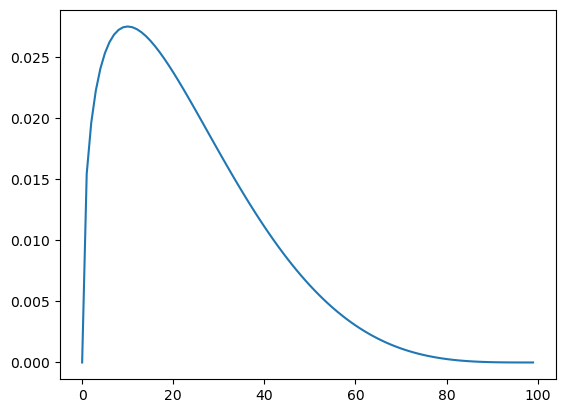

In [60]:
import matplotlib.pyplot as plt
import numpy as np

x_vec = np.arange(a,c,1)
vals = [p(x) for x in x_vec]
plt.plot(x_vec, vals)

### 1.1

In [68]:
def expected_value_integrand_p(x):
    return p(x) * x

def trapezoidal(fun, x0, xn, n):
    interval = (xn - x0) / n
    integral = 0
    
    x_prev = x0

    for x in np.arange(x0 + interval, xn + interval / 10, interval):
        integral += (x - x_prev)/2 * (fun(x) + fun(x_prev))

        x_prev = x

    return integral

for n in range(1,500):
    diff = np.abs(E - trapezoidal(expected_value_integrand_p, a, c, n)) 
    if diff < 5e-5:
        print(f"Difference between actual E[X] and approximated")
        print("---------------------------------------------------------")
        print(f"E[x] - E_hat[X] = {diff} using {n} samples")
        break

Difference between actual E[X] and approximated
---------------------------------------------------------
E[x] - E_hat[X] = 4.957722734388881e-05 using 271 samples


### 1.2